In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import seaborn as sns
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.applications import vgg16
from keras.callbacks import ModelCheckpoint

In [2]:
%cd C:\Users\fadel\Documents\ML\data\Fruit_category

C:\Users\fadel\Documents\ML\data\Fruit_category


## FRUIT PHOTOS

In [3]:
def random_photos(x,dir_='apple'):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(40,40))
        for i,file_name in enumerate(x):
            img=cv2.imread( os.path.join(dir_,file_name) )
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            
            ax[i//5][i%5].imshow(img, aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
        plt.show()

apple


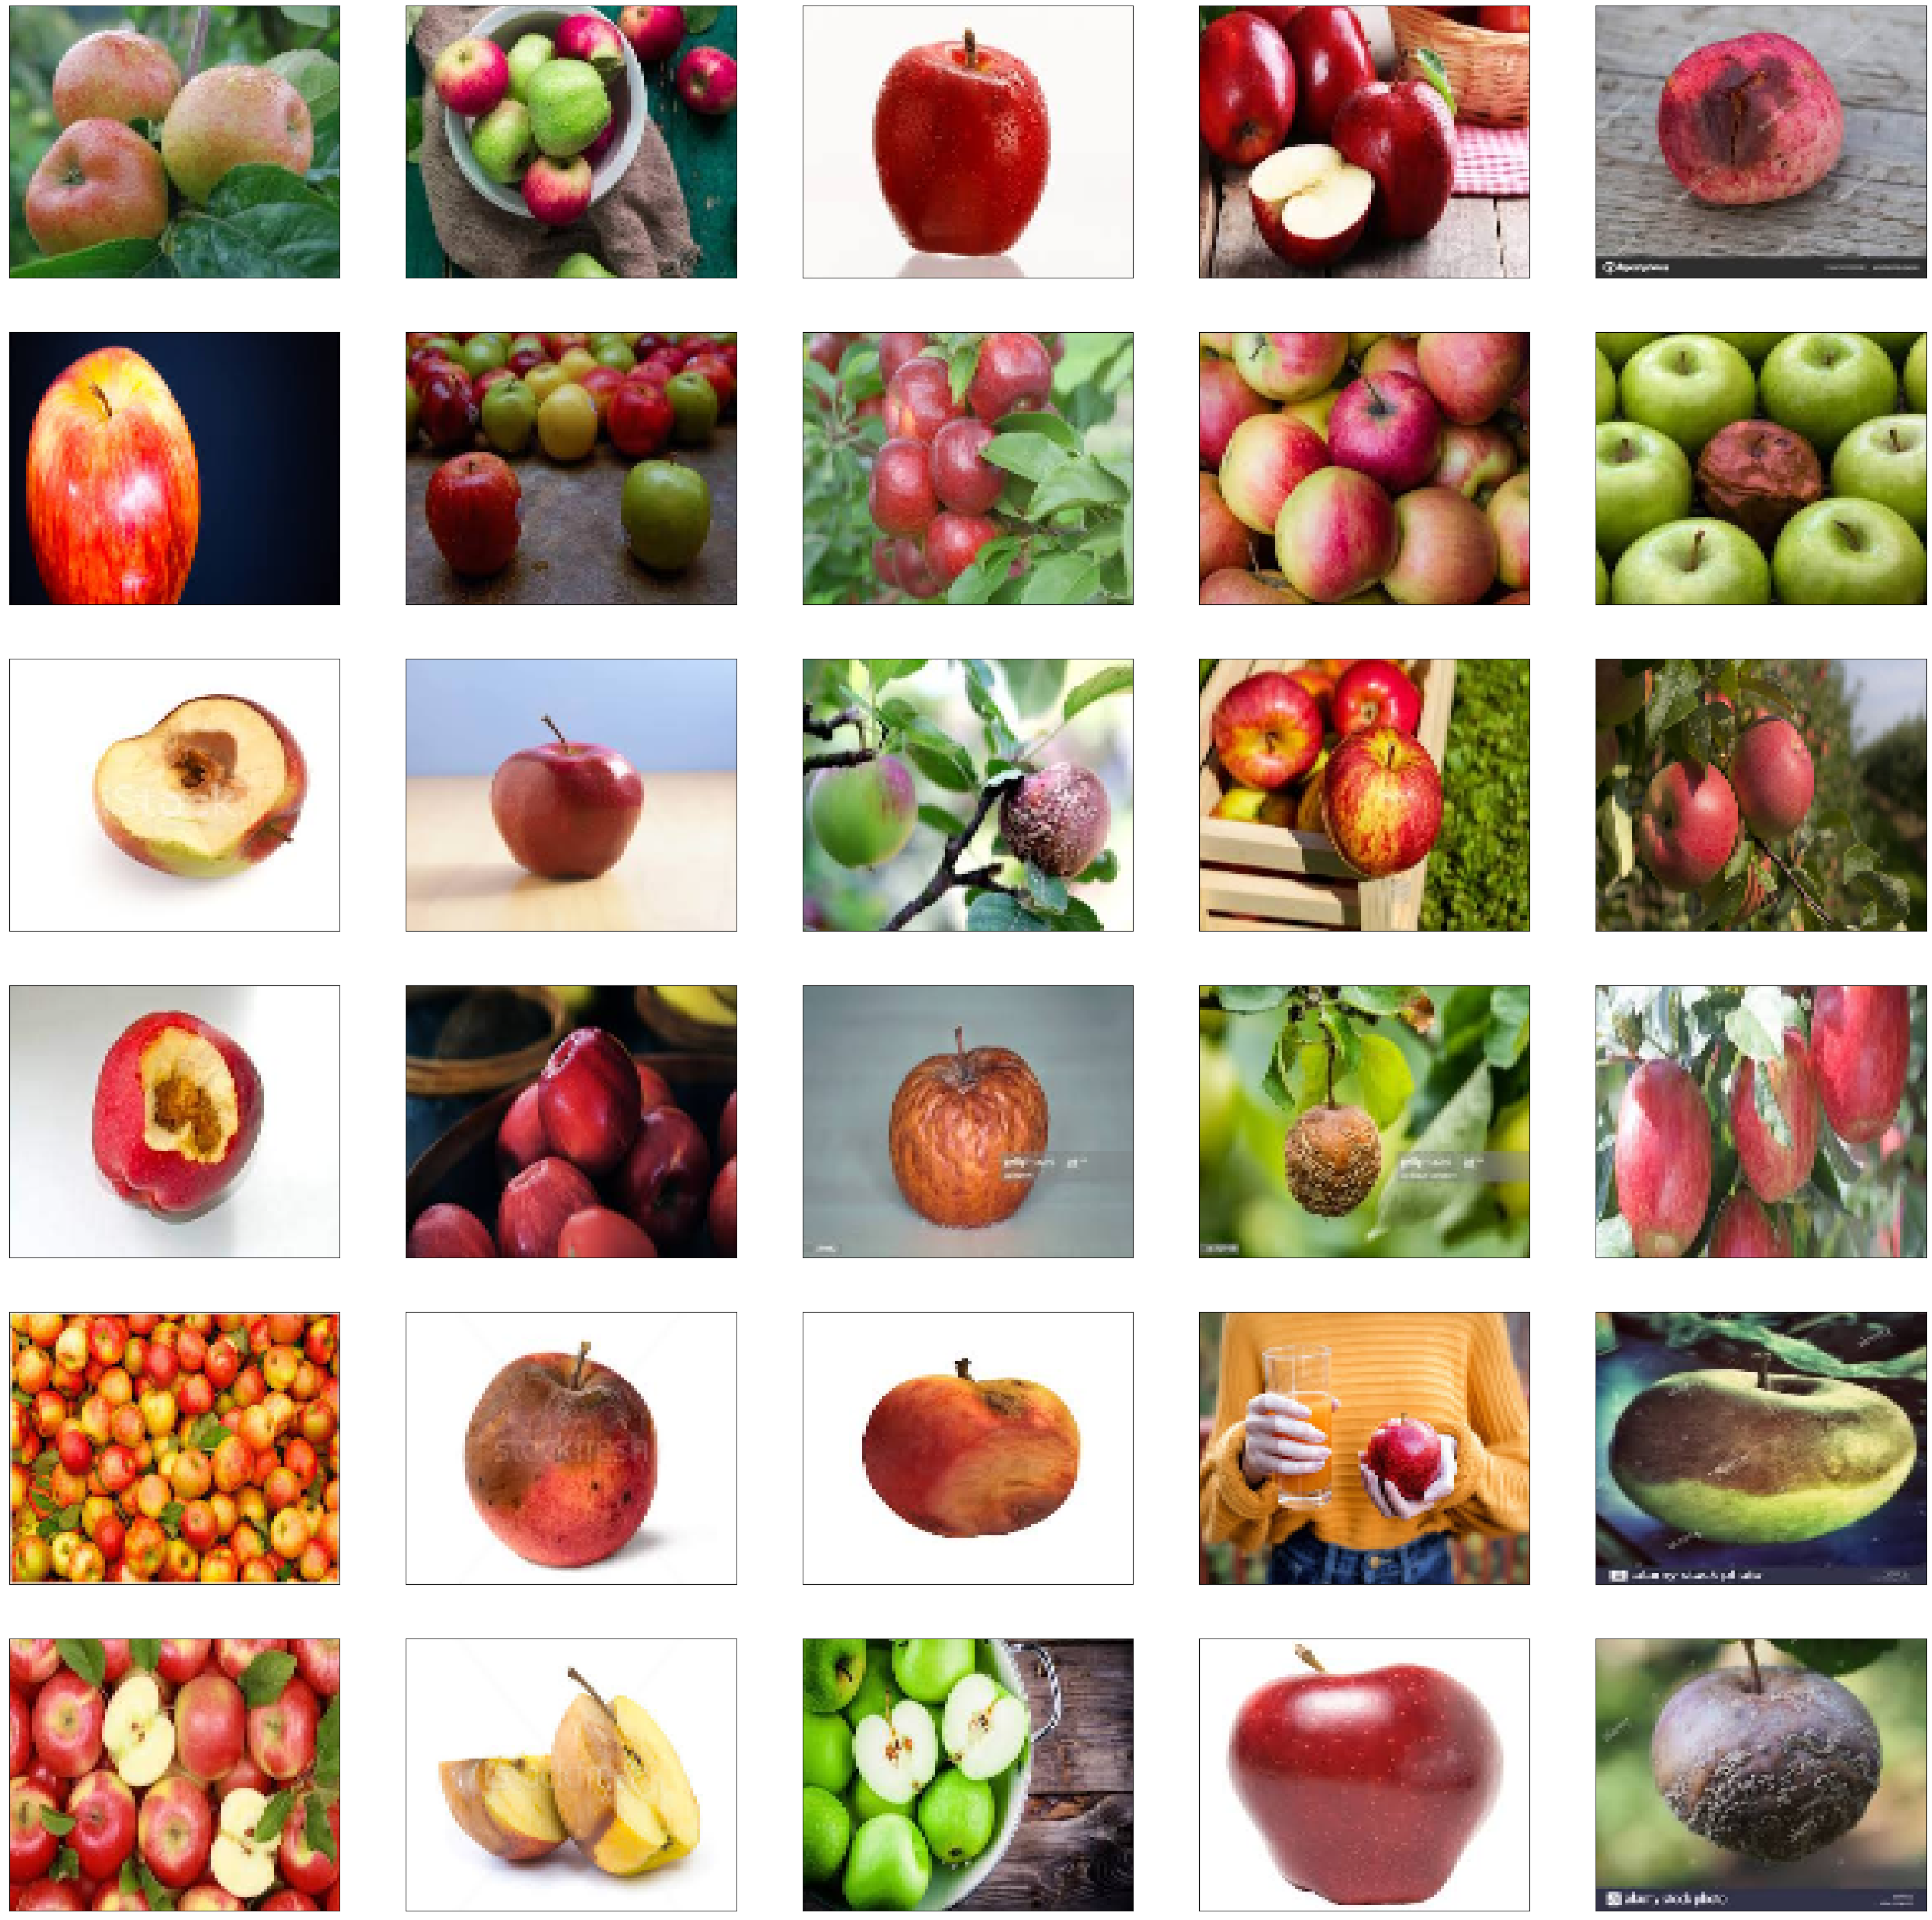

banana


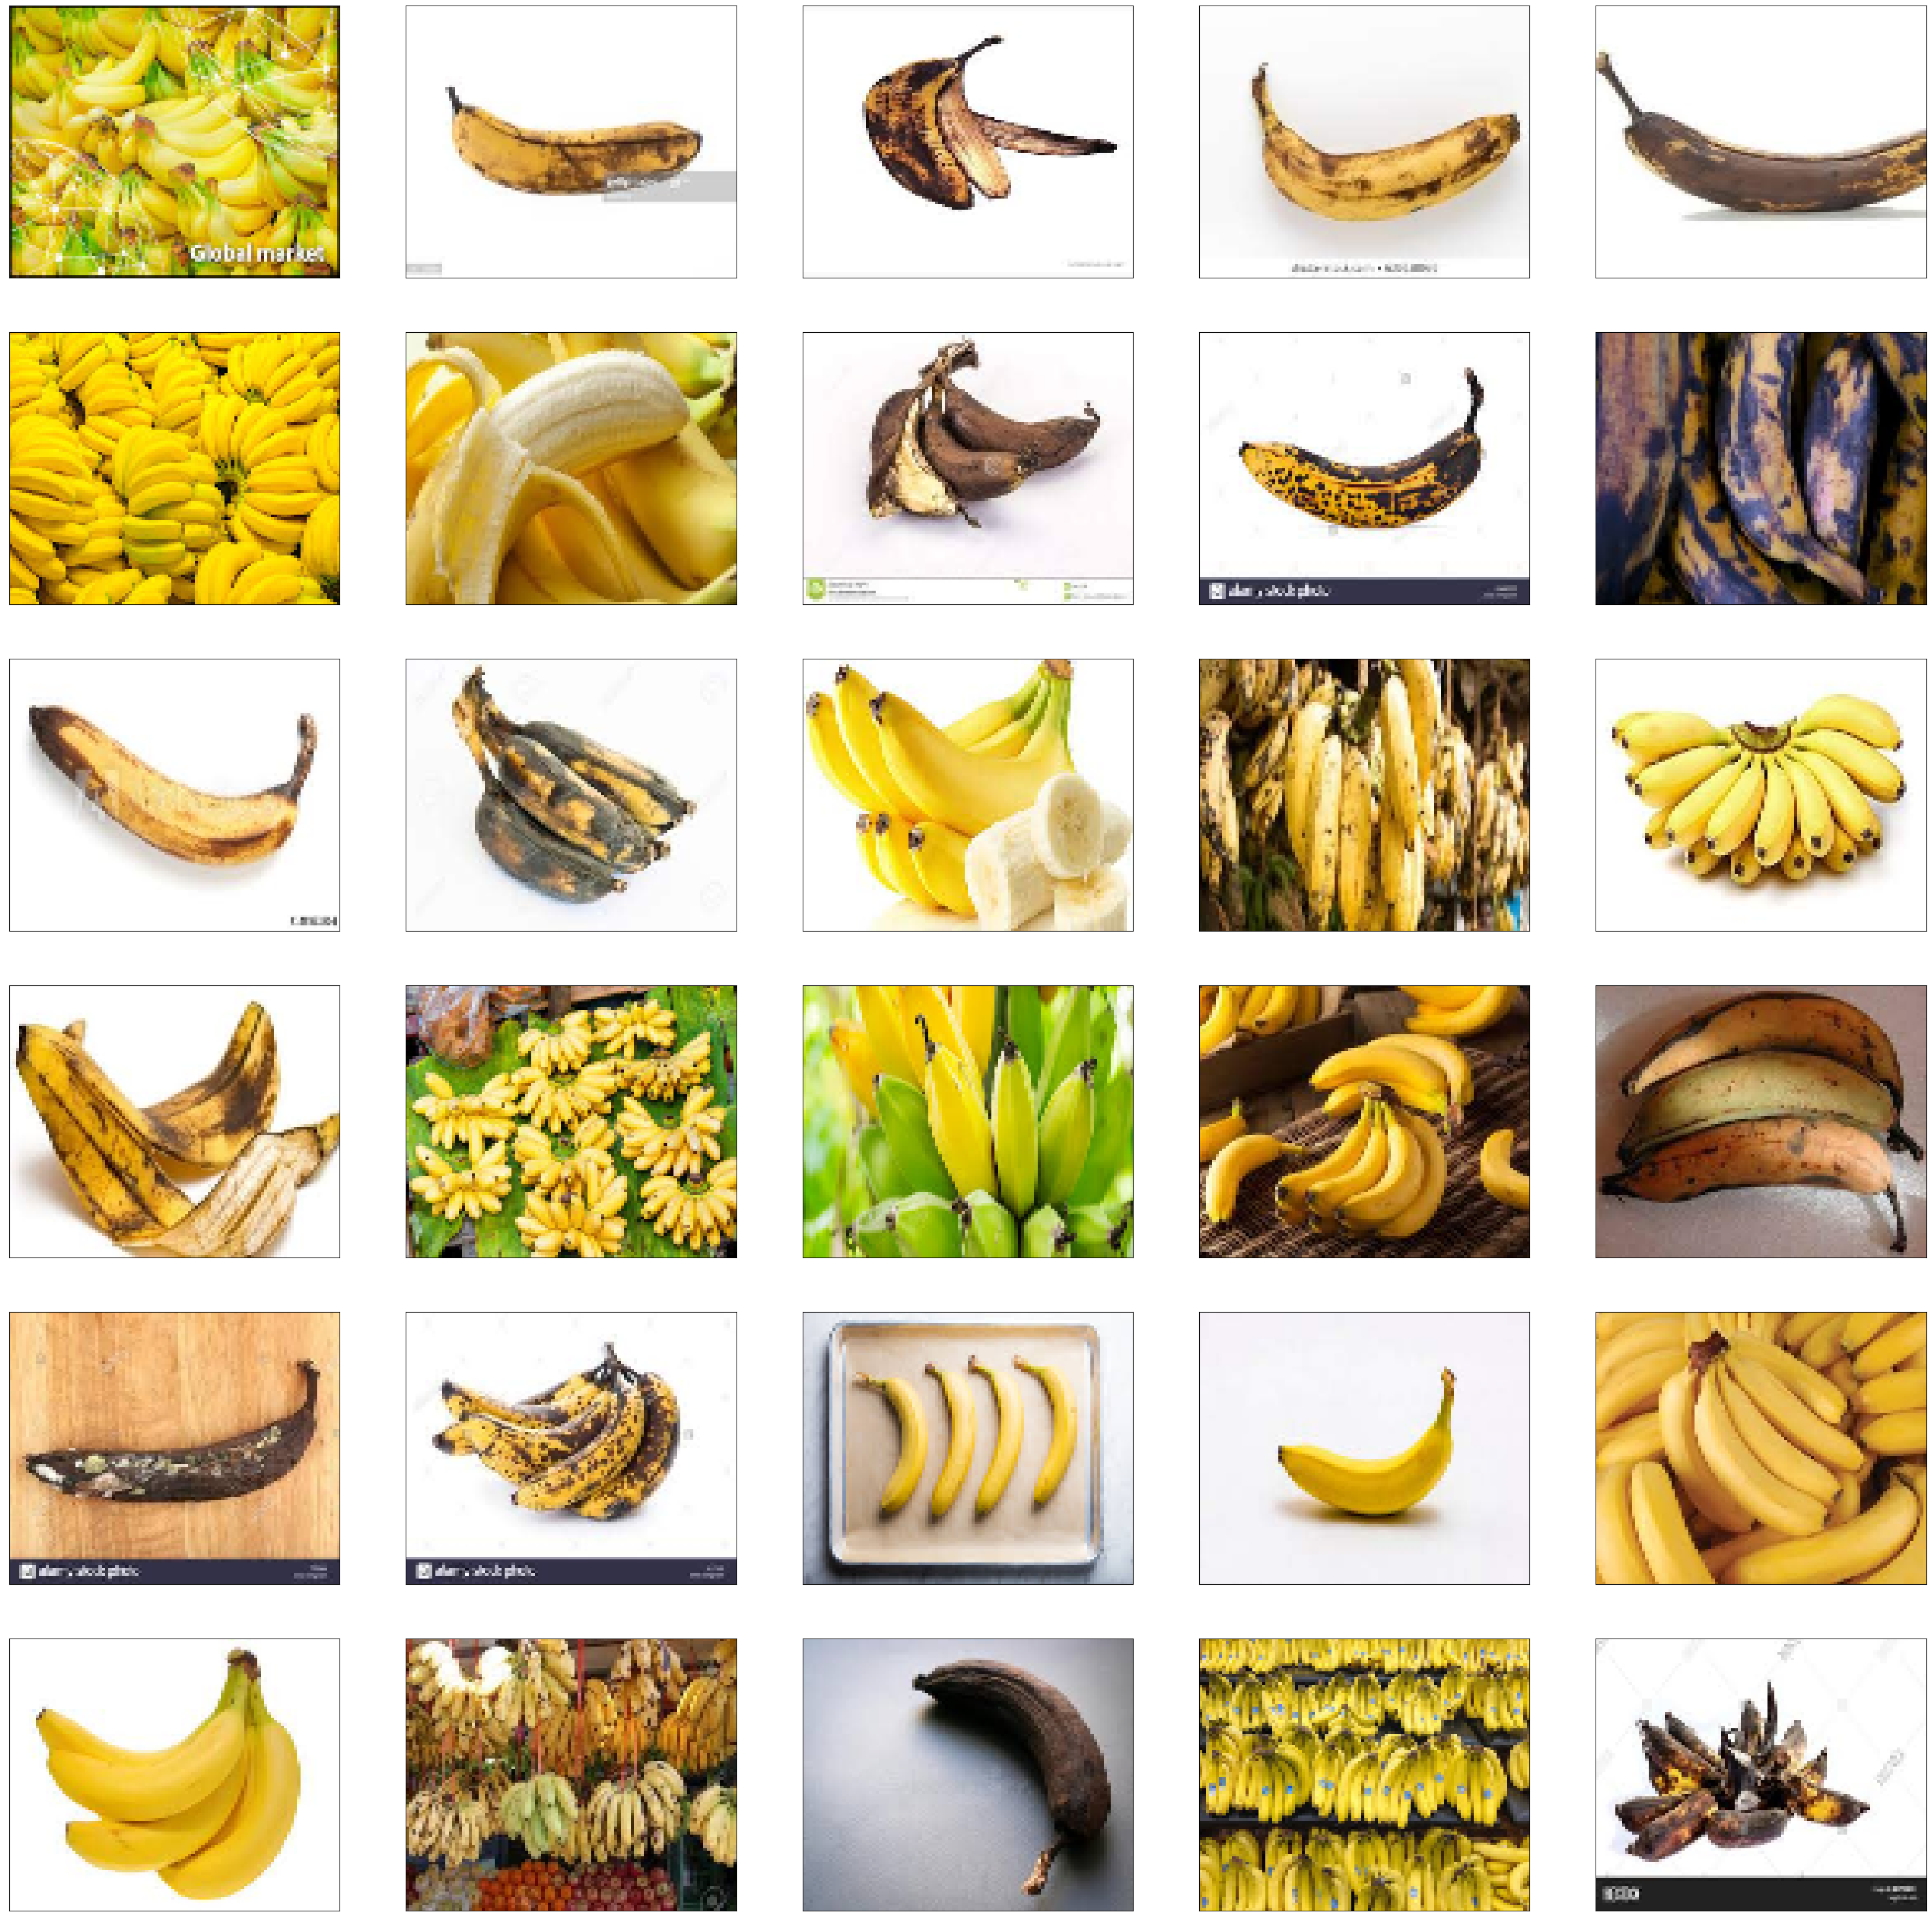

orange


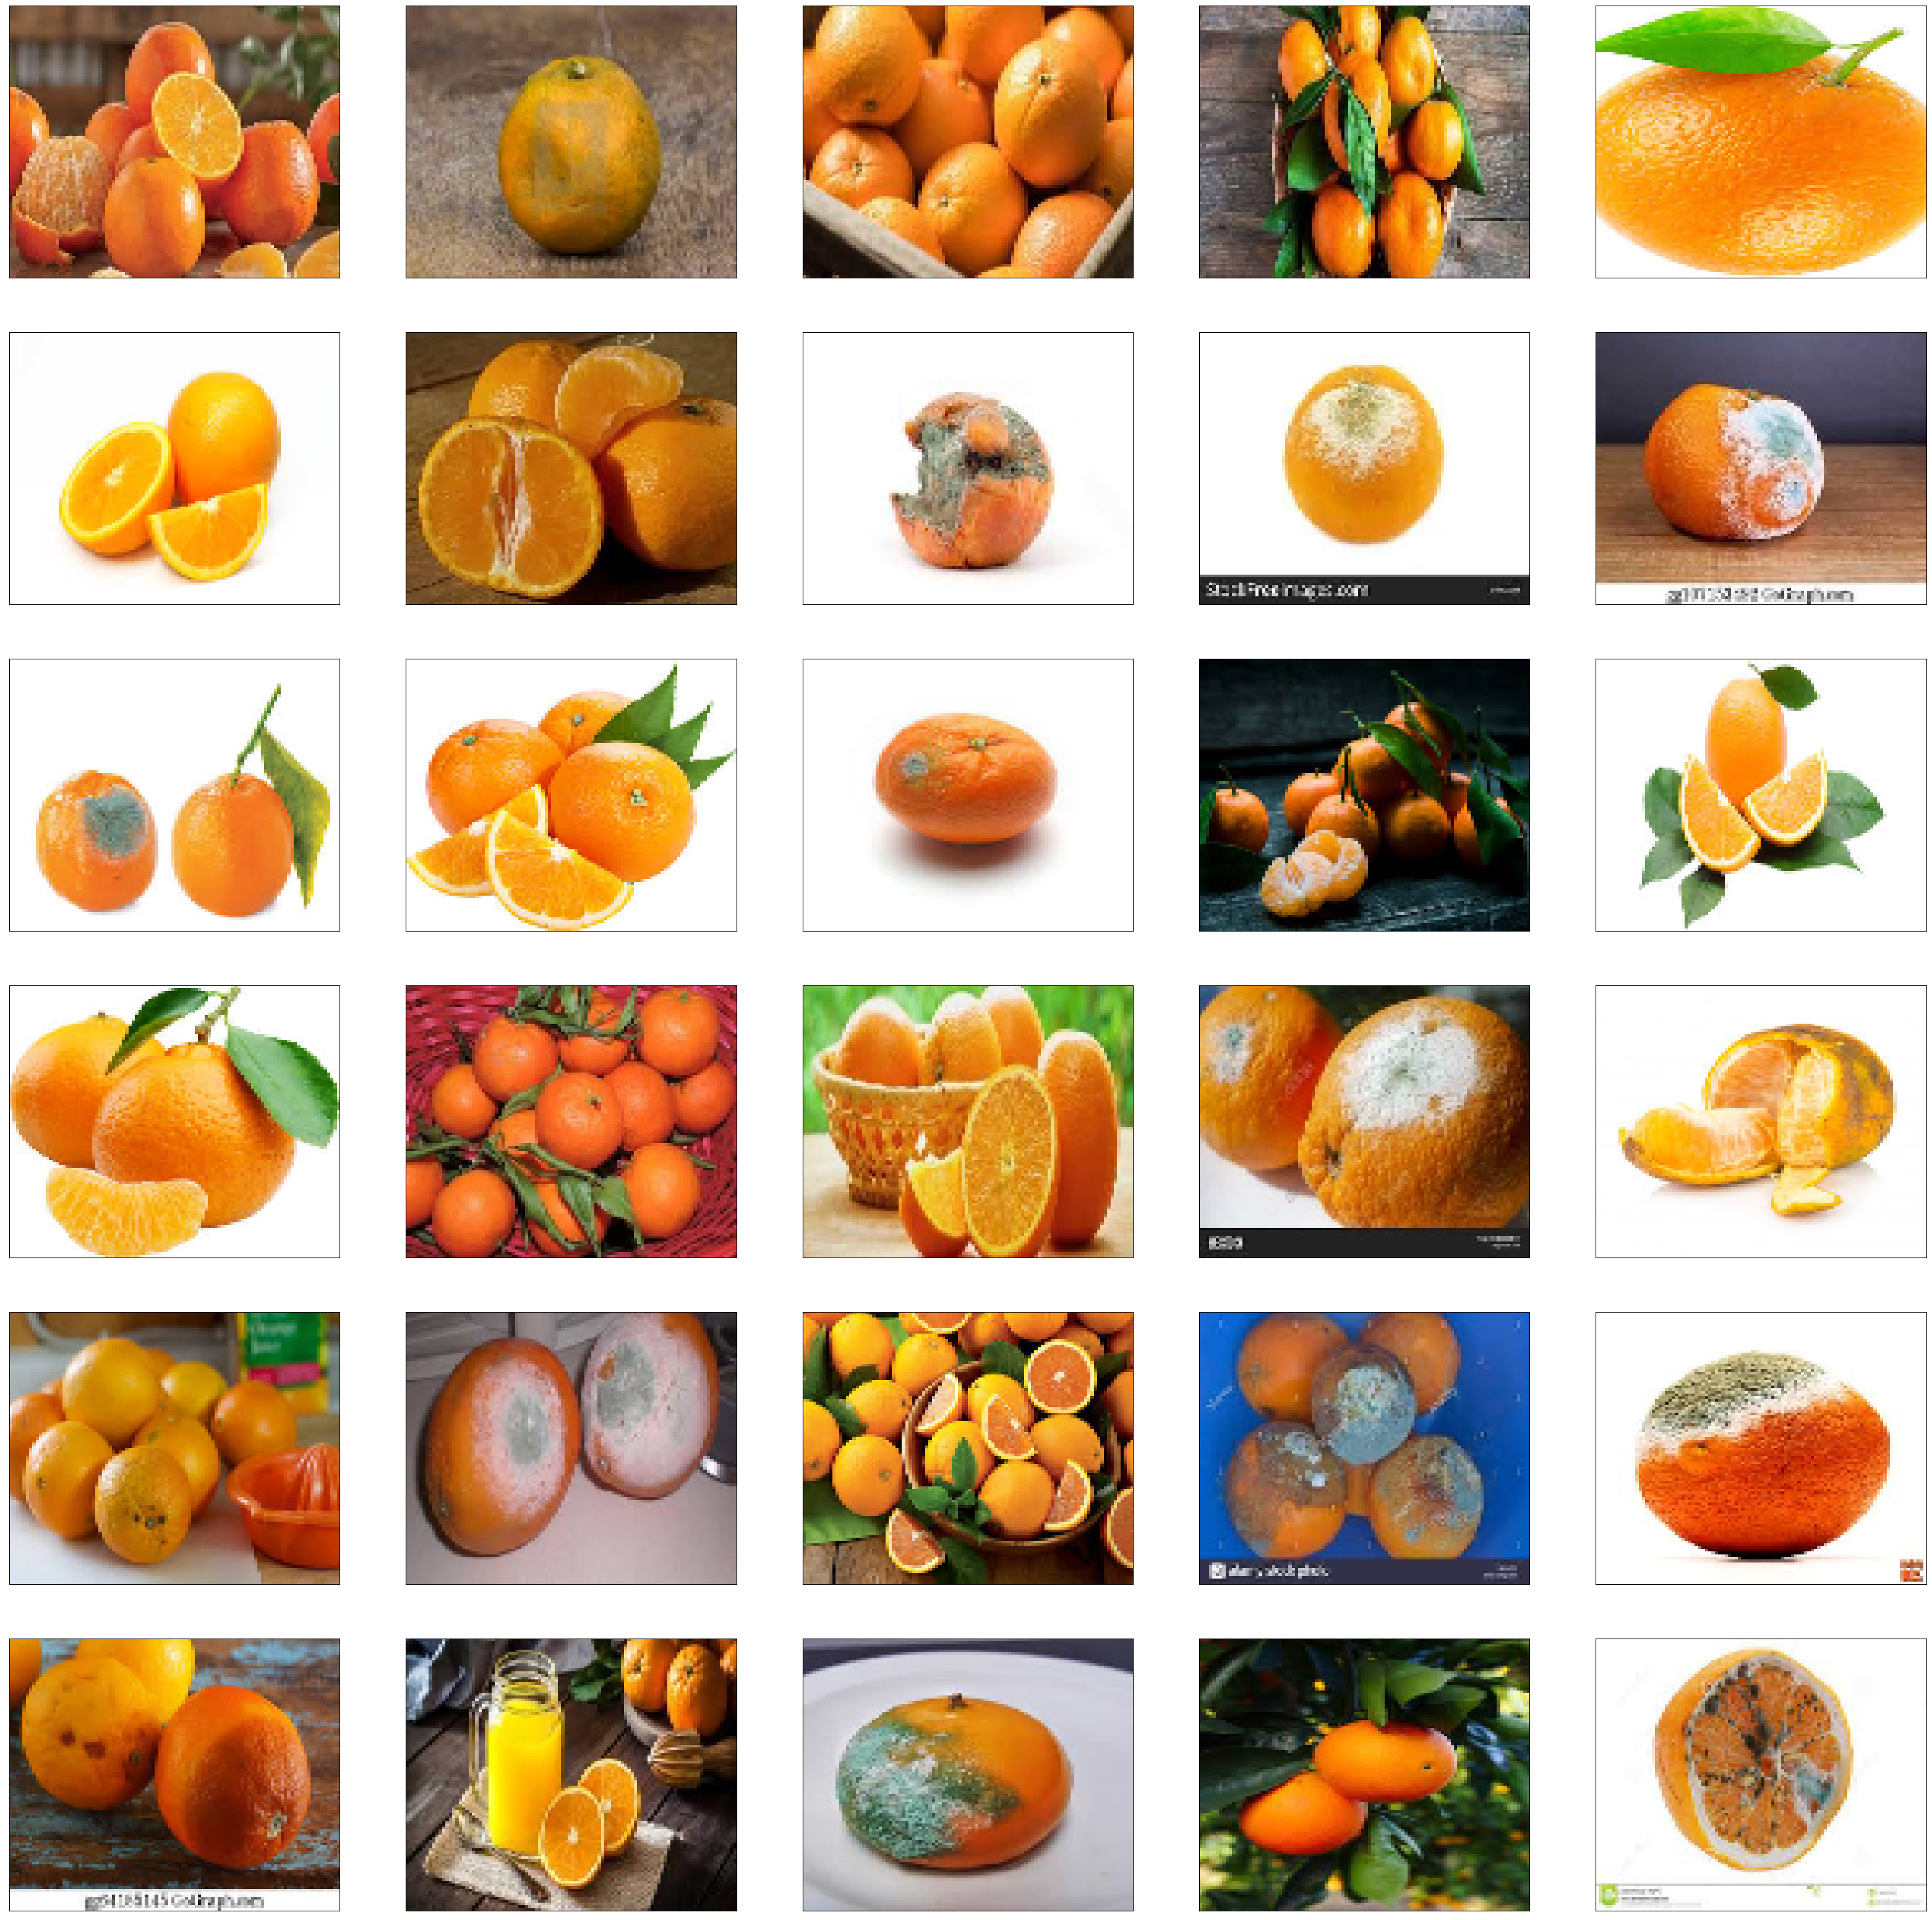

In [4]:
folder_list = ['apple', 'banana', 'orange']
for i in folder_list:
    print(i)
    random_photos(random.sample(os.listdir(i), 30),dir_=i)

In [5]:
train_datagen = ImageDataGenerator(rescale=1.255,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.18)

In [6]:
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\fadel\Documents\ML\data\Fruit_category',
    target_size=(100,100),
    batch_size=20,
    class_mode='categorical',
    subset='training') # set as training data


validation_generator = train_datagen.flow_from_directory(
    r'C:\Users\fadel\Documents\ML\data\Fruit_category', # same directory as training data
    target_size=(100,100),
    batch_size=20,
    class_mode='categorical',
    subset='validation')

Found 358 images belonging to 3 classes.
Found 77 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'apple': 0, 'banana': 1, 'orange': 2}